Our goal: To find the eigenvalues for a given potential
How are we going to do it??
1. Graph out the potential

2. Create code that can find the intersection points between any given E and V(x), using the bisection method.

3. Using equation (4), we create code that can plot a graph of $\psi$(x), from left to right and right to left.

4. Using the equation (5), since we have values for $\psi$(x)


But before all that, let us initalise our constants and call libraries

In [133]:
import numpy as np
import matplotlib.pyplot as plt
hbar = 1  
m = 1 
alpha = 1 
lambda_symbol = 4 
n = 10000


Step 1: We graph out the potential

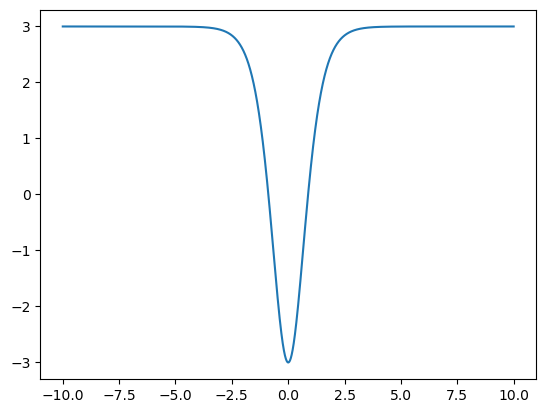

In [134]:
def V(x):
    return (hbar**2)*(alpha**2)*lambda_symbol*(lambda_symbol-1)*((1/2)-(1/(np.cosh(alpha*x)**2)))/2*m

x = np.linspace(-10,10,n)
plt.plot(x,V(x))
plt.show()

Step 2: Root finding method for values of E and V(x), using a test value of E which is a known eigenvalue

In [135]:
from scipy.optimize import fsolve
def f_root(x):
    return V(x)-E
E=2.5
positiveroot = fsolve(f_root,5)
print (positiveroot)
negativeroot = fsolve(f_root,-5)
print (negativeroot)


[1.91408424]
[-1.91408424]


Step 3: The Numerov method.
We iterate the equation until we reach one of the turning points of the equation. Since we are interested in the values near one of the turning points, we shall iterate psi left and psi right until both reach the 2nd turning point.

1.9140000000039787
1.9140000000039787
1.9160842356665506
5958
4042


C:\Users\adamf\AppData\Local\Temp\ipykernel_24448\3256986033.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xleft = np.arange(x0, positiveroot, h)
C:\Users\adamf\AppData\Local\Temp\ipykernel_24448\3256986033.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xright = np.arange(positiveroot+h, xf, h)


<function matplotlib.pyplot.show(close=None, block=None)>

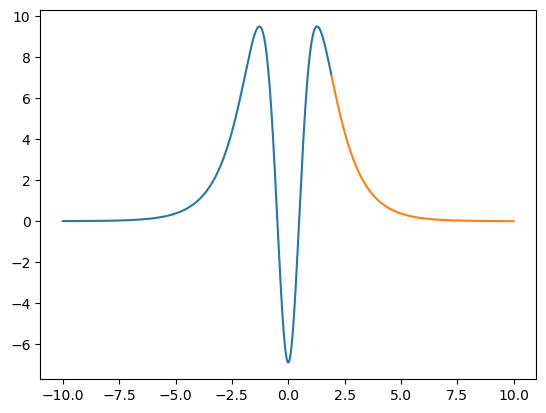

In [ ]:
def numerov(E, x, h):
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = 0.0, 1e-5
    
    f = lambda xi: 2 * m / hbar**2 * (E - V(xi))
    
    for i in range(1, N - 1):
        psi[i + 1] = (2 * (1 - 5 * h**2 * f(x[i]) / 12) * psi[i] - (1 + h**2 * f(x[i - 1]) / 12) * psi[i - 1]) / (1 + h**2 * f(x[i + 1])/ 12)
    
    return psi

x0, xf = -10, 10  # Range for x
h = 0.002               # Step size
xfull= np.arange(x0,xf,h)
xleft = np.arange(x0, positiveroot, h)
xright = np.arange(positiveroot+h, xf, h)
psileft = numerov(E, xleft, h)
psiright = numerov(E, xright[::-1], h)[::-1]

plt.plot(xleft,psileft)
plt.plot(xright,psiright)
plt.show


Step 4. Implementing the equation F(E)